<a href="https://colab.research.google.com/github/vavvari/MAT421/blob/main/ModuleB_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**17.1 Interpolation Problem Statement**

If we have a data set consisting of independent x-values (x_i) and dependent y-values (y_i) where i = 1,...,n, we can find an estimation function y(x) that goes through every point in our data set by using interpolation. With a new x*, we can interpolate function value y(x). y(x) is referred to as the interpolation function.

<ipython-input-20-c8b4d666c998>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


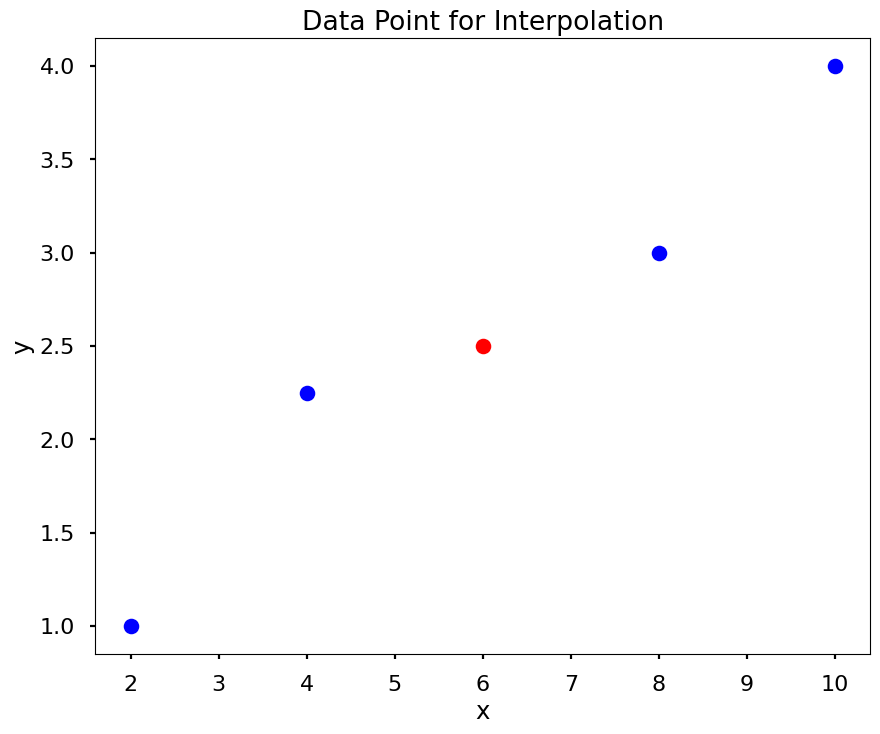

In [20]:
# imports for plot and interpolation
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')

# data set to be plotted
x = [2,4,8,10]
y = [1,2.25,3,4]
plt.figure(figsize = (10,8))
plt.plot(x,y,'bo', 6,2.5,'ro')
plt.title('Data Point for Interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

The data point we want to interpolate is shown in red. Unlike regression, interpolation does not require us to have an underlying model for the data.

**17.2 Linear Interpolation**

Linear interpolation is one of the simpler interpolation methods, where the point of estimation is assumed to lie on the line connecting the next closest points on the left and right.


In [21]:
# imports for plot and interpolation
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')

x = [2,4,8,10]
y = [1,2.25,3,4]

f = interp1d(x, y)
y_hat = f(6)
print(y_hat)

2.625


<ipython-input-21-984611dfaba9>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


We can then find the interpolation of x = 6 from the previous data set and plot the value along with the linear interpolation.

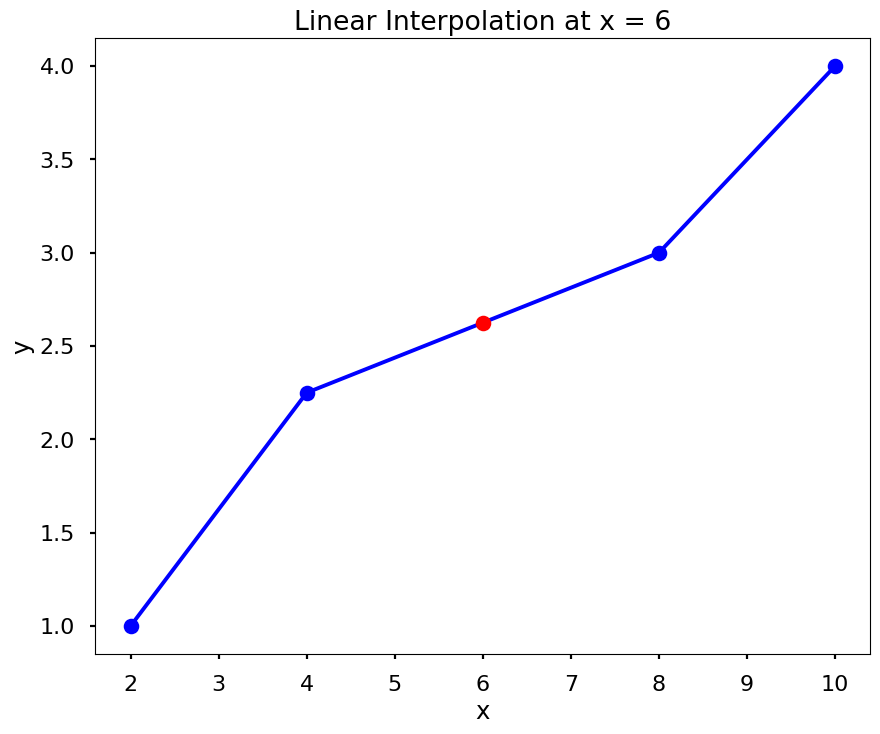

In [22]:
plt.figure(figsize = (10,8))
plt.plot(x, y, '-ob')
plt.plot(6, y_hat, 'ro')
plt.title('Linear Interpolation at x = 6')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

**17.3 Cubic Spline Interpolation**

With cubic spline interpolation, the interpolating function is actually a set of piecewise cubic functions.$(x_i,y_i)$ and $(x_{i+1},y_{i+1})$ are joined by a cubic polynomial $S_i(x)=a_ix^3+b_ix^2+c_ix+d_i$ that is valid for $x_i≤x≤x_{i+1}$ for i=1,…,n−1.

In order to find the interpolating function, we first need to find coefficients a, b, c, and d for each of our cubic functions. Given n points, we have n-1 cubic functions all with four coefficients, so 4(n-1) equations.


<ipython-input-23-785d3450a63f>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


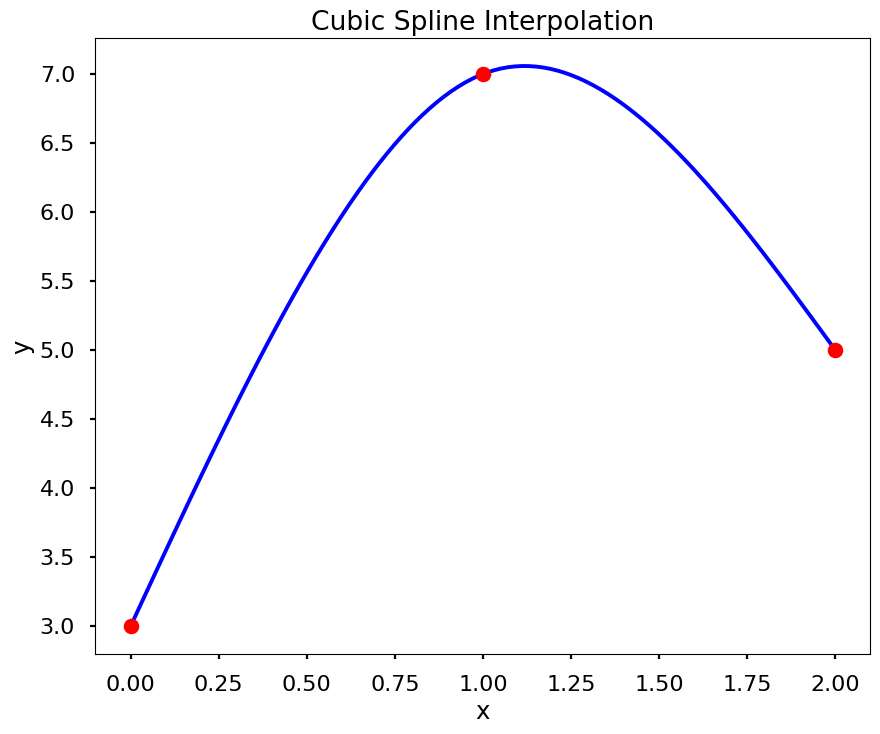

In [23]:
# imports for plot and cubic spline interpolation
from scipy.interpolate import CubicSpline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')

x = [0, 1, 2]
y = [3, 7, 5]
f = CubicSpline(x, y, bc_type='natural')
x_new = np.linspace(0, 2, 100)
y_new = f(x_new)

# plotting interpolation
plt.figure(figsize = (10,8))
plt.plot(x_new, y_new, 'b')
plt.plot(x, y, 'ro')
plt.title('Cubic Spline Interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

We can also create a system of equations and find our coefficients by solving the system in matrix form. Since we have 3 points, we have 3 - 1 = 2 equations. We first establish our constraints -

$a_1x_1^3 + b_1x_1^2 + c_1x_1 + d_1=y_1$
        
$a_2x_2^3 + b_2x_2^2 + c_2x_2 + d_2=y_2$
        
$a_1x_2^3 + b_1x_2^2 + c_1x_2 + d_1=y_2$
        
$a_2x_3^3 + b_2x_3^2 + c_2x_3 + d_2=y_3$

$3a_1x_2^2 + 2b_1x_2 + c_1 - 3a_2x_2^2 - 2b_2x_2 - c_2 = 0$
        
$6a_1x_2 + 2b_1 - 6a_2x_2 - 2b_2 = 0$,
        
$6a_1x_1 + 2b_1 = 0$
        
$6a_2x_3 + 2b_2 = 0$
        
Then after plugging in our points from data set -
        
$d_1=3$
        
$a_2 + b_2 + c_2 + d_2=7$
        
$a_1 + b_1 + c_1 + d_1=7$
        
$8a_2 + 4b_2 + 2c_2 + d_2=5$
        
$3a_1 + 2b_1 + c_1 - 3a_2 - 2b_2 - c_2 = 0$,
       
$6a_1 + 2b_1 - 6a_2 - 2b_2 = 0$,
        
$2b_1 = 0$
        
$12a_2 + 2b_2 = 0$

Now we can solve the system.
        

In [24]:
# setting up arrays
b = np.array([3, 7, 7, 5, 0, 0, 0, 0])
b = b[:, np.newaxis]
A = np.array([[0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 1, 1, 1, 1], [1, 1, 1, 1, 0, 0, 0, 0], \
[0, 0, 0, 0, 8, 4, 2, 1], [3, 2, 1, 0, -3, -2, -1, 0], [6, 2, 0, 0, -6, -2, 0, 0],\
[0, 2, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 12, 2, 0, 0]])

# multiply by inverse of A to find coefficients
np.dot(np.linalg.inv(A), b)

array([[-1.50000000e+00],
       [ 0.00000000e+00],
       [ 5.50000000e+00],
       [ 3.00000000e+00],
       [ 1.50000000e+00],
       [-9.00000000e+00],
       [ 1.45000000e+01],
       [ 5.32907052e-15]])

Thus we have the coefficients a, b, c, and d for both of our polynomials, and can complete our cubic spline interpolation of the data set.